## Análisis de la situación de la pandemia de COVID19 en Europa

In [2]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
#IMPORTAMOS LOS DATOS
datos=pd.read_excel("https://covid.ourworldindata.org/data/owid-covid-data.xlsx", "Sheet1",index_col=3,parse_dates=True)
# Importante leer la leyenda de los datos, disponible aquí:
# https://github.com/owid/covid-19-data/tree/master/public/data

In [6]:
# Crear copia local con las variables de interés
owid_covid=datos[['iso_code',"location","continent","population",
                  "new_cases_smoothed_per_million","new_deaths_smoothed_per_million",
                  'total_deaths_per_million']]
owid_covid.to_excel("C:/Users/danie/Dropbox/ECO/TEACHING/2021-2022/CyP/T2/Informe 2/owid_covid.xlsx")

In [4]:
# Exploración de los datos y selección
datos=datos.loc['2021-06':]
datos.columns
datos.shape
datos.query("continent=='Europe'").location.value_counts()
# datos.loc[datos['continent']=='Europe'].location.value_counts() # Equivalente a lo anterior

Russia                    147
Greece                    147
Romania                   147
Hungary                   147
Ireland                   147
Germany                   147
Slovakia                  147
Bulgaria                  147
Iceland                   147
Poland                    147
Switzerland               147
Latvia                    147
North Macedonia           147
Montenegro                147
Estonia                   147
Norway                    147
Sweden                    147
Czechia                   147
Bosnia and Herzegovina    147
United Kingdom            147
Italy                     147
Denmark                   147
Belgium                   147
Cyprus                    147
Netherlands               147
Liechtenstein             147
Portugal                  147
San Marino                147
Belarus                   147
France                    147
Croatia                   147
Luxembourg                147
Finland                   147
Moldova   

In [11]:
    #Preparamos los datos
df=datos.query("continent=='Europe' and population>5000000")
df.location.value_counts()
listcountries=df.location.unique()
df=df[['location','new_cases_smoothed_per_million']] # Manera sintética de seleccionar columnas
df=df.set_index([df.index,"location"]).unstack('location')

In [12]:
df

new_cases_smoothed_per_million                                      \
location                          Austria  Belarus  Belgium Bulgaria  Czechia   
date                                                                            
2021-06-01                         47.613  109.788  157.467   34.799   39.988   
2021-06-02                         46.903  105.945  156.043   30.740   37.604   
2021-06-03                         42.116  100.847  140.176   28.192   35.006   
2021-06-04                         38.830   97.050  128.988   25.499   34.087   
2021-06-05                         35.244   95.007  124.174   24.960   32.342   
...                                   ...      ...      ...      ...      ...   
2021-10-21                        299.092  214.281  361.763  529.884  191.443   
2021-10-22                        317.259  214.417  399.023  558.594  219.456   
2021-10-23                        338.728  214.584  399.023  589.395  252.212   
2021-10-24                        360.560  215.537  399.023  597.060  273.511   
2021-10-25                        375.615  216.157  481.036  615.371  287.338   

                                                                         \
location    Denmark Finland   France  Germany   Greece  Hungary   Italy   
date                                                                      
2021-06-01  171.061  23.121  144.362   51.660  145.740   32.652  53.037   
2021-06-02  168.112  20.753  120.463   52.721  143.921   33.571  50.578   
2021-06-03  165.925  21.911  123.901   47.168  134.733   32.370  45.419   
2021-06-04  164.254  20.444  114.775   41.760  123.410   29.716  42.625   
2021-06-05  153.269  23.533  104.472   37.905  115.627   27.269  40.462   
...             ...     ...      ...      ...      ...      ...     ...   
2021-10-21  149.509  90.966   73.044  156.754  279.757  139.548  47.152   
2021-10-22  164.377  83.912   73.604  162.592  292.471  158.810  49.873   
2021-10-23  179.072  83.912   76.535  171.860  304.235  158.810  52.057   
2021-10-24  199.174  83.912   79.095  160.154  309.552  158.810  55.105   
2021-10-25  215.737  94.777   79.533  164.916  320.434  209.433  57.332   

                                                                               \
location   Netherlands   Norway   Poland Portugal  Romania   Russia    Serbia   
date                                                                            
2021-06-01     170.582   63.069   21.472   51.956   13.623   61.394    40.800   
2021-06-02     168.411   59.253   19.189   53.783   12.017   61.840    38.732   
2021-06-03     163.595   56.117   16.781   56.550   11.188   61.738    36.499   
2021-06-04     151.375   55.176   14.423   54.190   10.471   61.438    34.017   
2021-06-05     141.068   53.163   13.051   53.684    9.829   61.297    31.350   
...                ...      ...      ...      ...      ...      ...       ...   
2021-10-21     236.117   92.108   95.030   66.849  783.341  227.131   966.736   
2021-10-22     254.110   97.806  106.165   69.153  780.219  231.873   993.040   
2021-10-23     270.290  103.269  117.662   72.961  780.384  236.158  1007.453   
2021-10-24     292.010  108.888  126.000   74.913  781.720  237.394  1021.019   
2021-10-25     308.073  117.984  131.356   75.223  774.595  240.833  1009.583   

                                                                          
location   Slovakia   Spain   Sweden Switzerland  Ukraine United Kingdom  
date                                                                      
2021-06-01   23.022  91.374   57.620      88.070   62.718         48.499  
2021-06-02   21.295  91.303   19.207      83.497   58.820         51.166  
2021-06-03   20.536  91.181  119.796      76.875   55.763         54.929  
2021-06-04   20.484  89.613  134.826      69.974   52.349         59.357  
2021-06-05   23.545  89.613  134.826      69.974   48.408         64.413  
...             ...     ...      ...         ...      ...            ...  
2021-10-21  380

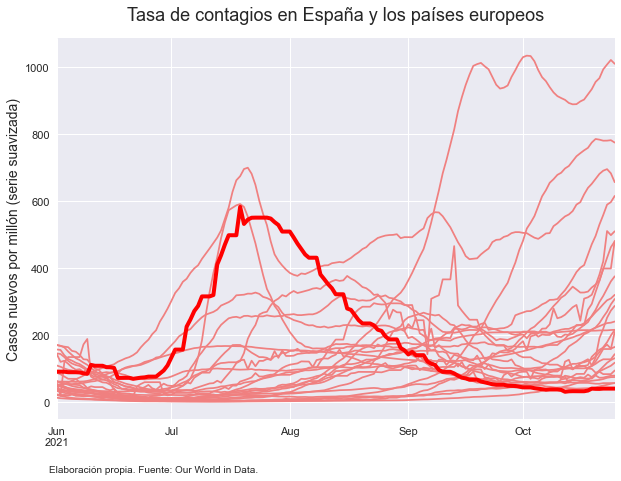

In [13]:
# Ejemplo de figura con un bucle
fig,ax=plt.subplots(figsize=(10,7))
for c in listcountries:
    df["new_cases_smoothed_per_million"][c].plot(color="lightcoral", ax=ax)
df["new_cases_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Casos nuevos por millón (serie suavizada)", size=14)
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
fig.text(0.26,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

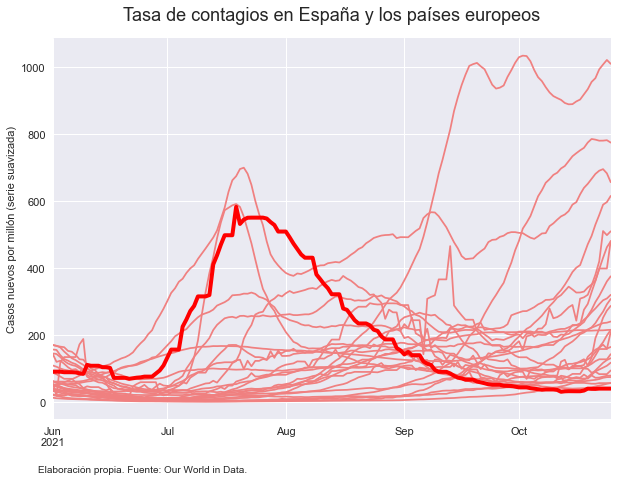

In [14]:
# También se podría hacer sin bucle
fig,ax=plt.subplots(figsize=(10,7))
df["new_cases_smoothed_per_million"].plot(color="lightcoral",  legend=False, ax=ax)
df["new_cases_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Casos nuevos por millón (serie suavizada)")
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [15]:
# Este más informativo
df2=df[-7:].mean()
df2.sort_values(inplace=True, ascending=False)
df2=df2.reset_index()
newlist=df2.location.to_list()
df=df['new_cases_smoothed_per_million'][newlist]

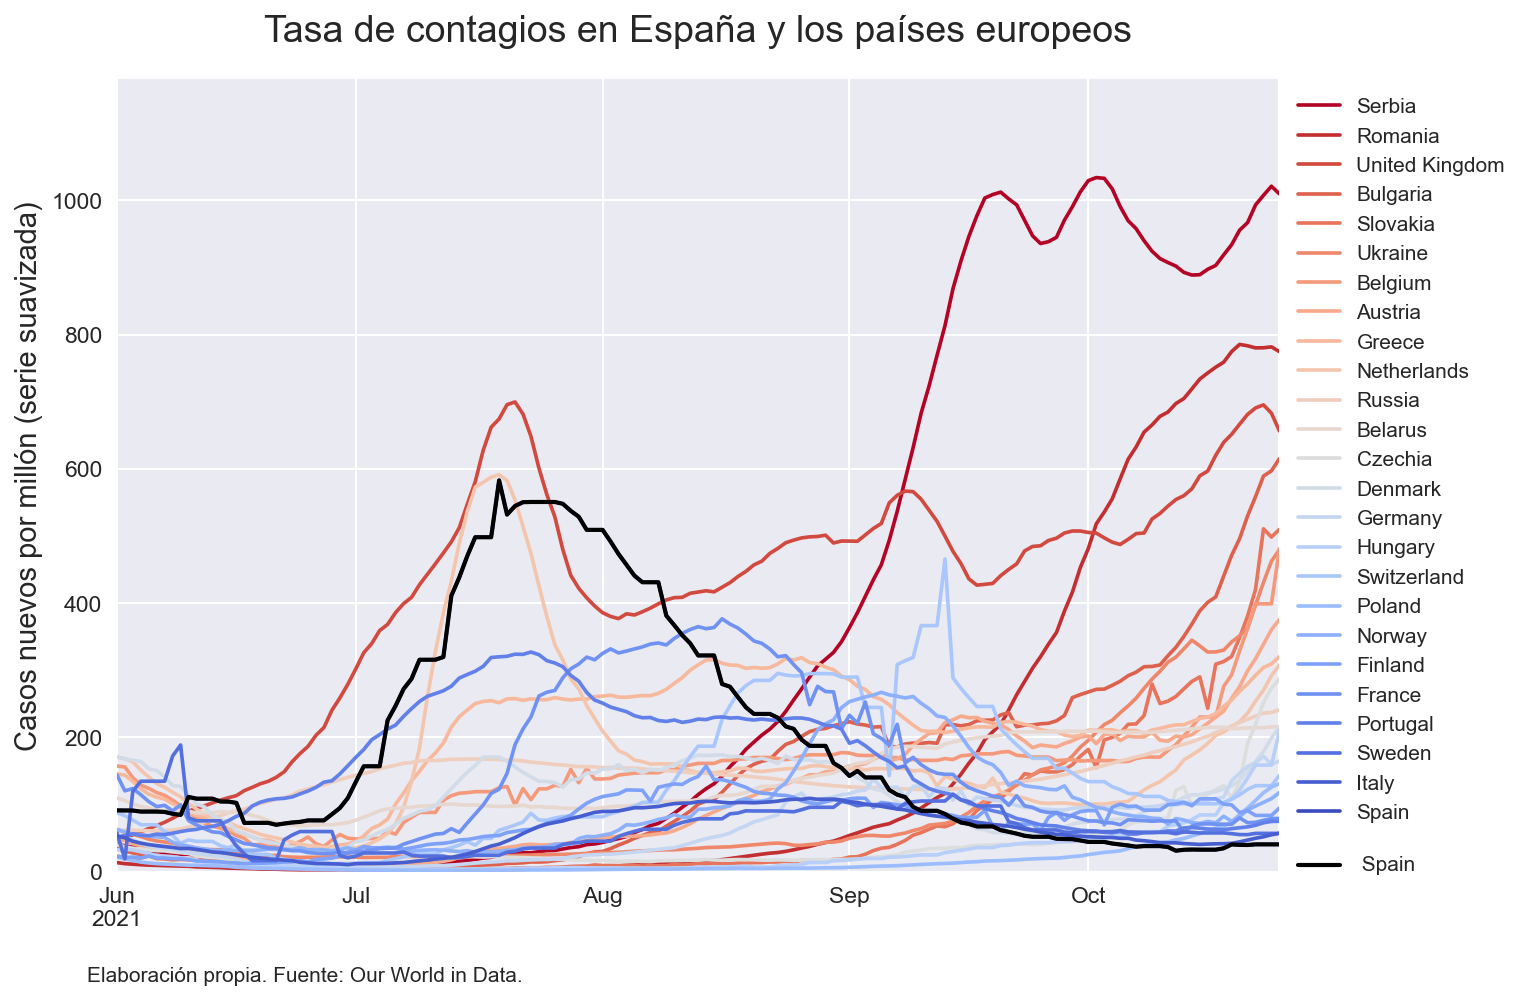

In [17]:
fig,ax=plt.subplots(figsize=(10,7), dpi=150)
df.plot(colormap="coolwarm_r", ax=ax)
df["Spain"].plot(c="black", linewidth=2, ax=ax, label="\n Spain \n ")
ax.set_xlabel("")
ax.set_ylabel("Casos nuevos por millón (serie suavizada)", size=14)
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
ax.set_ylim(0,df2[0].max()*1.2)
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(labelsize=11)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [18]:
# Ahora un gráfico para el caso de las muertes
    #Preparamos los datos
df=datos.query("continent=='Europe' and population>5000000")
df.location.value_counts()
listcountries=df.location.unique()
df=df[['location','new_deaths_smoothed_per_million']] 
df=df.set_index([df.index,"location"]).unstack('location')
df

new_deaths_smoothed_per_million                                   \
location                           Austria Belarus Belgium Bulgaria Czechia   
date                                                                          
2021-06-01                           1.011   1.059   1.167    3.004   1.039   
2021-06-02                           0.869   1.059   1.142    2.693   0.959   
2021-06-03                           0.853   1.074   1.142    3.211   1.026   
2021-06-04                           0.679   1.074   1.277    3.273   0.719   
2021-06-05                           0.695   1.044   1.204    3.231   0.746   
...                                    ...     ...     ...      ...     ...   
2021-10-21                           1.216   1.710   1.265   15.266   0.839   
2021-10-22                           1.295   1.710   1.216   16.302   0.866   
2021-10-23                           1.327   1.710   1.216   16.613   0.919   
2021-10-24                           1.327   1.710   1.216   16.550   0.932   
2021-10-25                           1.280   1.710   1.339   17.151   0.946   

                                                                             \
location   Denmark Finland France Germany Greece Hungary  Italy Netherlands   
date                                                                          
2021-06-01   0.147   0.360  1.658   1.784  3.444   2.669  1.704       0.549   
2021-06-02   0.123   0.335  1.554   1.609  3.154   2.254  1.564       0.566   
2021-06-03   0.147   0.335  1.402   1.429  3.154   2.046  1.299       0.549   
2021-06-04   0.123   0.283  1.324   1.349  3.072   2.017  1.174       0.491   
2021-06-05   0.049   0.283  1.300   1.388  3.154   1.972  1.112       0.507   
...            ...     ...    ...     ...    ...     ...    ...         ...   
2021-10-21   0.491   0.592  0.482   0.792  3.168   1.883  0.622       0.474   
2021-10-22   0.418   0.592  0.465   0.810  3.278   2.091  0.615       0.482   
2021-10-23   0.418   0.592  0.472   0.822  3.444   2.091  0.674       0.632   
2021-10-24   0.344   0.592  0.469   0.833  3.485   2.091  0.674       0.599   
2021-10-25   0.270   0.772  0.465   0.729  3.637   2.447  0.641       0.616   

                                                                         \
location   Norway Poland Portugal Romania Russia Serbia Slovakia  Spain   
date                                                                      
2021-06-01  0.026  2.872    0.056   2.338  2.578  1.468    1.360  0.556   
2021-06-02  0.052  2.566    0.056   2.412  2.567  1.448    1.413  0.593   
2021-06-03  0.052  2.400    0.098   2.748  2.559  1.386    1.439  0.492   
2021-06-04  0.052  2.056    0.084   3.271  2.534  1.365    1.282  0.886   
2021-06-05  0.052  1.727    0.126   3.570  2.530  1.344    1.622  0.889   
...           ...    ...      ...     ...    ...    ...      ...    ...   
2021-10-21  0.235  1.066    0.646  20.329  6.783  7.962    2.407  0.565   
2021-10-22  0.261  1.104    0.660  20.270  6.841  8.106    1.831  0.483   
2021-10-23  0.261  1.221    0.576  20.972  6.907  8.189    2.067  0.483   
2021-10-24  0.261  1.266    0.506  21.644  6.973  8.354    1.491  0.483   
2021-10-25  0.261  1.255    0.534  21.943  7.033  8.561    1.648  0.477   

                                                      
location   Sweden Switzerland Ukraine United Kingdom  
date                                                  
2021-06-01  0.773       0.328   3.484          0.092  
2021-06-02  0.211       0.361   3.316          0.098  
2021-06-03  0.858       0.344   3.047          0.115  
2021-06-04  1.012       0.344   2.843          0.117  
2021-06-05  1.012       0.295   2.619          0.130  
...           ...         ...     ...            ...  
2021-10-21  0.844       0.426   8.545          1.916  
2021-10-22  0.520       0.393   9.922          1.992  
2021-10-23  0.520       0.393  10.616          1.965  
2021-10-24  0.520       0.426  11.191          1.996  
2021-10-25  0.520       0.508  

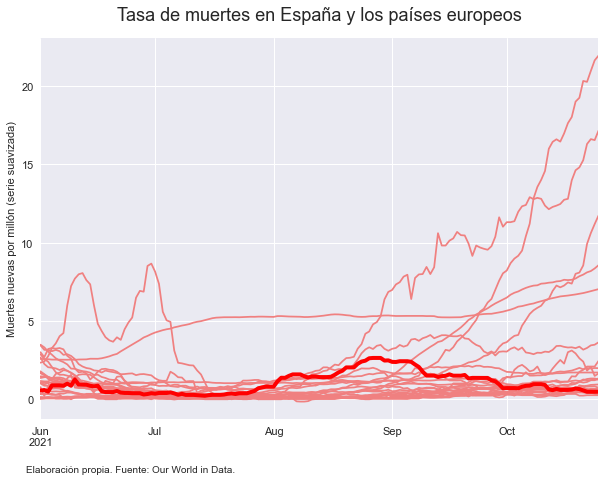

In [19]:
fig,ax=plt.subplots(figsize=(10,7))
df["new_deaths_smoothed_per_million"].plot(color="lightcoral",  legend=False, ax=ax)
df["new_deaths_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Muertes nuevas por millón (serie suavizada)")
ax.set_title("Tasa de muertes en España y los países europeos", size=18, pad=18)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [20]:
# Última celda del notebook
# 1. Guardar esta última versión que acaba de ejecutarse
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
# 2. Producir el informe en versión HTML
import os
os.chdir(r"C:\Users\danie\CyP")
os.system("jupyter nbconvert Tema2_Pandemia_COVID19_Europa.ipynb --to html --no-input --no-prompt ")

<IPython.core.display.Javascript object>

0

**¿Es posible convertir el notebook de Google Colab a HTML?** 

Sí, aunque es algo más tedioso. Viene explicado con detalle aquí: https://stackoverflow.com/a/64487858.

Al final, en lugar de escribir:
```python
%%shell
jupyter nbconvert --to html /your_path/NOTEBOOKFILE.ipynb
```
debéis escribir:
```python
%%shell
jupyter nbconvert --to html --no-input --no-prompt /your_path/NOTEBOOKFILE.ipynb
```
para que no os salgan las celdas con código.

Obviamente, en ```/your_path/NOTEBOOKFILE.ipynb``` debéis poner lo que tenéis en el portapapeles al clicar en ```Copiar ruta```.